In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("combined_data.csv")
df.head()

,Unnamed: 0,index,z,symbol,n,a,radius_val,radius_unc,N-Z,MASS EXCESS,MASS EXCESS UNC,BINDING ENERGY/A,BINDING ENERGY UNC,ATOMIC MASS,ATOMIC MASS UNC,jp,half_life [s],decay,radioactive
0,0,0,0,n,1,1,-0.1149,0.0027,1,8071.318060,0.000440,0.00000,0.0000,1008664.916,0.000470,1/2+,6.139000e+02,B-,1
1,1,1,1,H,0,1,0.8783,0.0086,-1,7288.971064,0.000013,0.00000,0.0000,1007825.032,0.000014,1/2+,3.441658e+29,stable,0
2,2,2,1,H,1,2,2.1421,0.0088,0,13135.722900,0.000015,1112.28310,0.0002,2014101.778,0.000015,1+,3.441658e+29,stable,0
3,3,3,1,H,2,3,1.7591,0.0363,1,14949.810900,0.000080,2827.26540,0.0003,3016049.281,0.000080,1/2+,3.887813e+08,B-,1
4,4,4,2,He,1,3,1.9661,0.0030,-1,14931.218880,0.000060,2572.68044,0.0001,3016029.322,0.000060,1/2+,3.441658e+29,stable,0


In [3]:
df.drop(columns=["Unnamed: 0",],axis=1,inplace=True) # this is an extra index column
df_no_unc = df.drop(columns=["radius_unc", "MASS EXCESS UNC", "BINDING ENERGY UNC", "ATOMIC MASS UNC"],axis=1) # don't worry about uncertainties to start
df_no_unc.describe()

,index,z,n,a,radius_val,N-Z,MASS EXCESS,BINDING ENERGY/A,ATOMIC MASS,half_life [s],radioactive
count,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,957.000000,9.570000e+02,9.570000e+02,957.000000
mean,478.000000,54.748171,76.220481,130.968652,4.689252,21.472309,-50015.910316,8147.680713,1.309150e+08,3.441658e+29,0.743992
std,276.406404,23.598461,36.057028,59.404798,0.830347,13.603797,34668.444214,694.654949,5.941365e+07,7.853791e+30,0.436655
min,0.000000,0.000000,0.000000,1.000000,-0.114900,-4.000000,-91652.843000,0.000000,1.007825e+06,8.750000e-03,0.000000
25%,239.000000,38.000000,51.000000,90.000000,4.261100,10.000000,-78144.769000,7912.066600,8.990714e+07,1.440000e+02,0.000000
50%,478.000000,56.000000,80.000000,137.000000,4.849600,21.000000,-61012.171000,8237.928600,1.369146e+08,3.358800e+04,1.000000
75%,717.000000,76.000000,105.000000,182.000000,5.380500,31.000000,-26937.498000,8509.612000,1.819747e+08,3.441658e+29,1.000000
max,956.000000,96.000000,152.000000,248.000000,5.904800,56.000000,67392.748000,8794.555500,2.480723e+08,2.430000e+32,1.000000


In [4]:
from sklearn.preprocessing import StandardScaler
df_no_unc_subset = df_no_unc[["radius_val","MASS EXCESS","BINDING ENERGY/A", "ATOMIC MASS", " half_life [s]"]] #
df_no_unc_subset[" half_life [s]"] = np.log(df_no_unc_subset[" half_life [s]"]) # make log scale due to variation in values
scaler = StandardScaler()
scaler.fit(df_no_unc_subset)
standardized = scaler.transform(df_no_unc_subset)
df_scaled = pd.DataFrame(standardized,columns=["radius_val","MASS EXCESS","BINDING ENERGY/A", "ATOMIC MASS", " half_life [s]"]) #

df_scaled = pd.concat([df_scaled, df_no_unc[['z', 'n', 'a', 'N-Z', ' jp', ' decay', 'radioactive']]], axis=1)
df_scaled.head()

C:\Users\docke\AppData\Local\Temp\ipykernel_20216\668940712.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_unc_subset[" half_life [s]"] = np.log(df_no_unc_subset[" half_life [s]"]) # make log scale due to variation in values


,radius_val,MASS EXCESS,BINDING ENERGY/A,ATOMIC MASS,half_life [s],z,n,a,N-Z,jp,decay,radioactive
0,-5.788740,1.676383,-11.735238,-2.187615,-0.689293,0,1,1,1,1/2+,B-,1
1,-4.591989,1.653805,-11.735238,-2.187630,1.555245,1,0,1,-1,1/2+,stable,0
2,-3.069179,1.822541,-10.133198,-2.170684,1.555245,1,1,2,0,1+,stable,0
3,-3.530673,1.874895,-7.663081,-2.153811,-0.202468,1,2,3,1,1/2+,B-,1
4,-3.281249,1.874358,-8.029764,-2.153812,1.555245,2,1,3,-1,1/2+,stable,0


In [5]:
df_scaled.describe()

,radius_val,MASS EXCESS,BINDING ENERGY/A,ATOMIC MASS,half_life [s],z,n,a,N-Z,radioactive
count,9.570000e+02,9.570000e+02,9.570000e+02,9.570000e+02,9.570000e+02,957.000000,957.000000,957.000000,957.000000,957.000000
mean,7.127701e-16,-1.484938e-16,-1.930419e-16,2.375900e-16,5.939751e-17,54.748171,76.220481,130.968652,21.472309,0.743992
std,1.000523e+00,1.000523e+00,1.000523e+00,1.000523e+00,1.000523e+00,23.598461,36.057028,59.404798,13.603797,0.436655
min,-5.788740e+00,-1.201632e+00,-1.173524e+01,-2.187630e+00,-1.095939e+00,0.000000,0.000000,1.000000,-4.000000,0.000000
25%,-5.158995e-01,-8.117920e-01,-3.393589e-01,-6.905696e-01,-7.421354e-01,38.000000,51.000000,90.000000,10.000000,0.000000
50%,1.932108e-01,-3.173494e-01,1.299855e-01,1.010331e-01,-5.434464e-01,56.000000,80.000000,137.000000,21.000000,1.000000
75%,8.329163e-01,6.660374e-01,5.212955e-01,8.598433e-01,1.555245e+00,76.000000,105.000000,182.000000,31.000000,1.000000
max,1.464669e+00,3.388385e+00,9.317043e-01,1.972925e+00,1.794297e+00,96.000000,152.000000,248.000000,56.000000,1.000000


## With Charge Radius

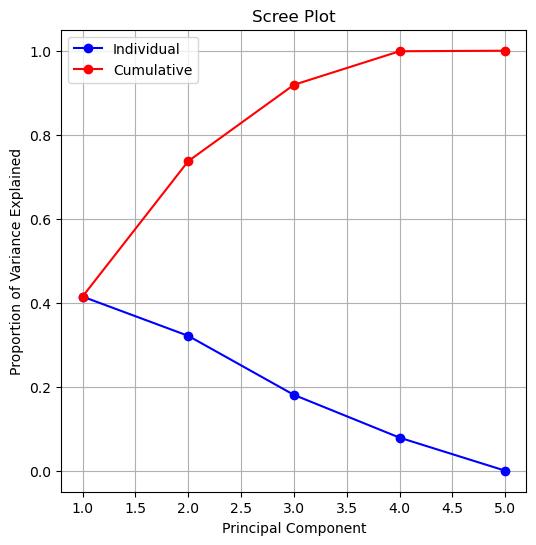

In [7]:
U, S, Vt = np.linalg.svd(standardized)

plt.figure(figsize=(6,6))
var_exp = S**2 / np.sum(S**2) # calculate the variance explianed by each feature
cum_var_exp = np.cumsum(var_exp) # calculate the cumulative variance explained at each feature

plt.plot(range(1, len(var_exp) + 1), var_exp, 'bo-', label='Individual') # plot the variance explained of each component
plt.plot(range(1, len(cum_var_exp) + 1), cum_var_exp, 'ro-', label='Cumulative') # plot the cumulate variance explained at each component
plt.xlabel('Principal Component') # add xlabel
plt.ylabel('Proportion of Variance Explained') # add ylabel
plt.title('Scree Plot') # add title
plt.legend() # add legend
plt.grid(True) # add grid lines

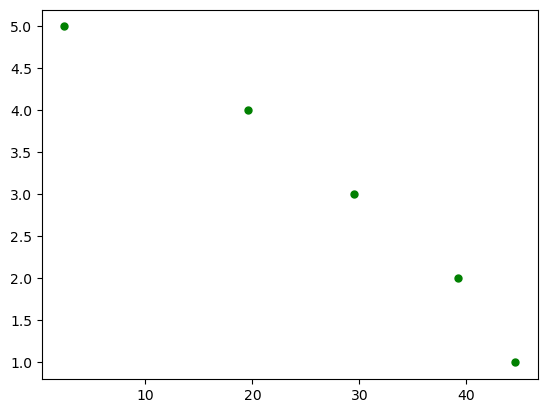

In [8]:
plt.plot(S,np.linspace(1,len(S),len(S)),"g.",ms=10)

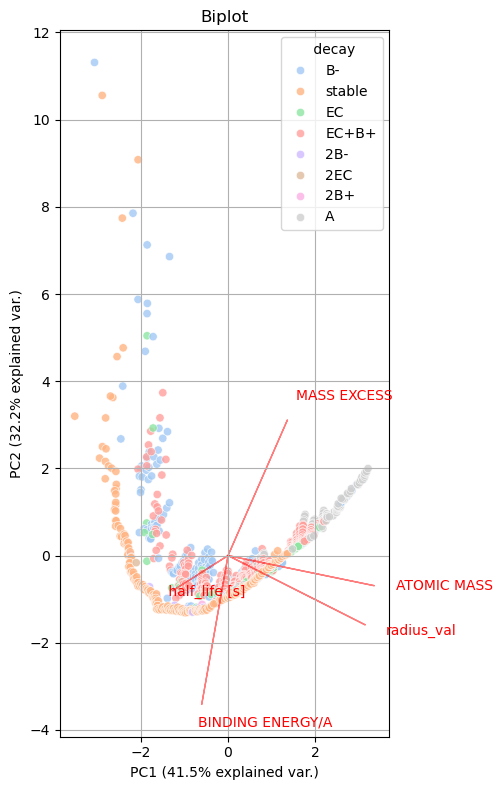

In [9]:
def create_biplot(X_scaled, feature_names, pc1=0, pc2=1, scale_arrows=5):
    # Perform SVD
    U, S, Vt = np.linalg.svd(X_scaled, full_matrices=False)
    
    # Calculate scores (projected data points)
    scores = U * S
    
    # Get loadings (eigenvectors)
    loadings = Vt.T
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(8, 8))
    
    # Plot scores
    #ax.scatter(scores[:, pc1], scores[:, pc2], alpha=0.7)
    sns.scatterplot(x=scores[:, pc1], y=scores[:, pc2], alpha=0.8, ax=ax, hue=df_scaled[" decay"], palette="pastel")
    
    # Plot feature vectors
    for i, feature in enumerate(feature_names):
        ax.arrow(0, 0,
                loadings[i, pc1] * scale_arrows,
                loadings[i, pc2] * scale_arrows,
                color='r', alpha=0.5)
        ax.text(loadings[i, pc1] * scale_arrows * 1.15,
                loadings[i, pc2] * scale_arrows * 1.15,
                feature, color='r')
    
    # Add labels and title
    ax.set_xlabel(f'PC{pc1+1} ({var_exp[pc1]:.1%} explained var.)')
    ax.set_ylabel(f'PC{pc2+1} ({var_exp[pc2]:.1%} explained var.)')
    ax.set_title('Biplot')
    
    # Add grid
    ax.grid(True)
    
    # Make equal aspect ratio
    ax.set_aspect('equal')
    
    return fig, ax

# Create the biplot
fig, ax = create_biplot(standardized, ["radius_val","MASS EXCESS","BINDING ENERGY/A", "ATOMIC MASS", " half_life [s]"]) #"radius_val",
plt.tight_layout()
plt.show()

## Without Charge Radius

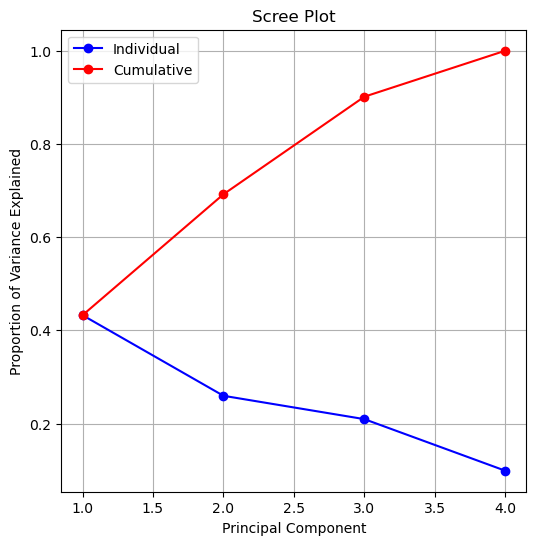

In [11]:
U, S, Vt = np.linalg.svd(standardized[:,1:])

plt.figure(figsize=(6,6))
var_exp = S**2 / np.sum(S**2) # calculate the variance explianed by each feature
cum_var_exp = np.cumsum(var_exp) # calculate the cumulative variance explained at each feature

plt.plot(range(1, len(var_exp) + 1), var_exp, 'bo-', label='Individual') # plot the variance explained of each component
plt.plot(range(1, len(cum_var_exp) + 1), cum_var_exp, 'ro-', label='Cumulative') # plot the cumulate variance explained at each component
plt.xlabel('Principal Component') # add xlabel
plt.ylabel('Proportion of Variance Explained') # add ylabel
plt.title('Scree Plot') # add title
plt.legend() # add legend
plt.grid(True) # add grid lines

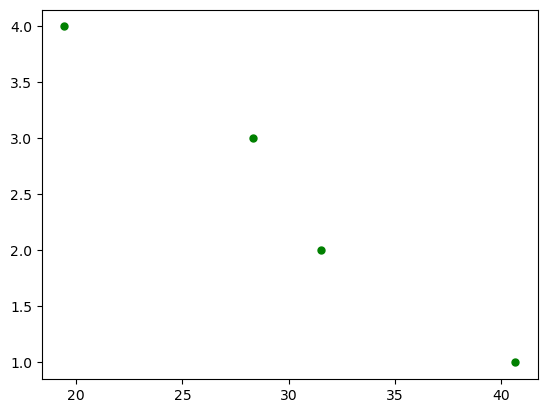

In [12]:
plt.plot(S,np.linspace(1,len(S),len(S)),"g.",ms=10)

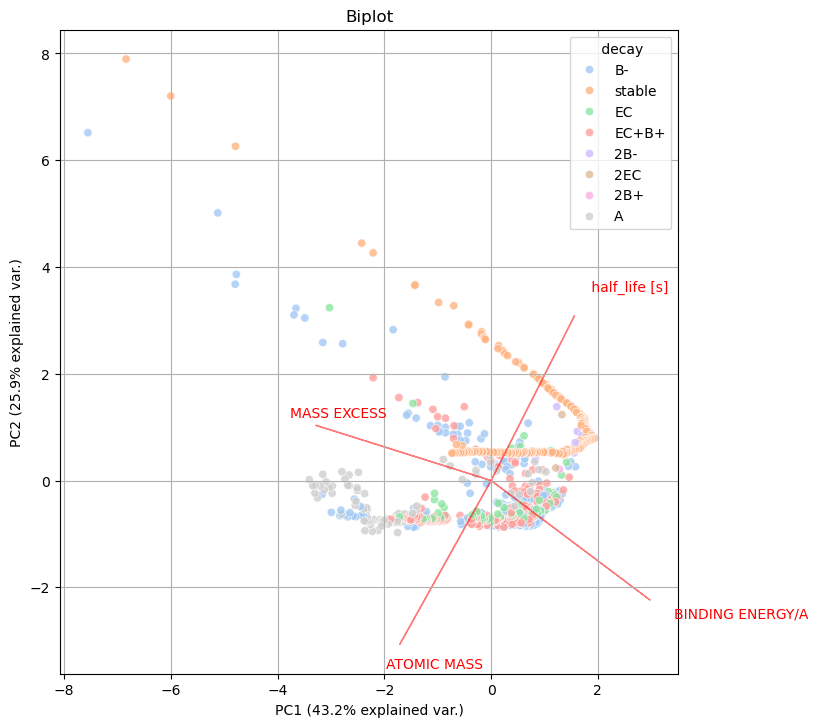

In [13]:
fig, ax = create_biplot(standardized[:,1:], ["MASS EXCESS","BINDING ENERGY/A", "ATOMIC MASS", " half_life [s]"]) #"radius_val",
plt.tight_layout()
plt.show()

## Regression on A

In [15]:
import lmfit 
from lmfit.models import PowerLawModel, ConstantModel

In [16]:
y=df_scaled["radius_val"]
x=df_scaled["a"]

mod = PowerLawModel() + ConstantModel()
params = mod.make_params()
params["exponent"].set(value=1/3)
params["amplitude"].set(value=1)
result = mod.fit(y, params, x=x)
print(result.fit_report())

[[Model]]
    (Model(powerlaw) + Model(constant))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 957
    # variables        = 3
    chi-square         = 9.33839864
    reduced chi-square = 0.00978868
    Akaike info crit   = -4424.59286
    Bayesian info crit = -4410.00145
    R-squared          = 0.99024201
[[Variables]]
    amplitude:  0.95299974 +/- 0.04304424 (4.52%) (init = 1)
    exponent:   0.34425359 +/- 0.00623959 (1.81%) (init = 0.3333333)
    c:         -4.93265317 +/- 0.07496390 (1.52%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, exponent) = -0.9975
    C(amplitude, c)        = -0.9890
    C(exponent, c)         = +0.9765


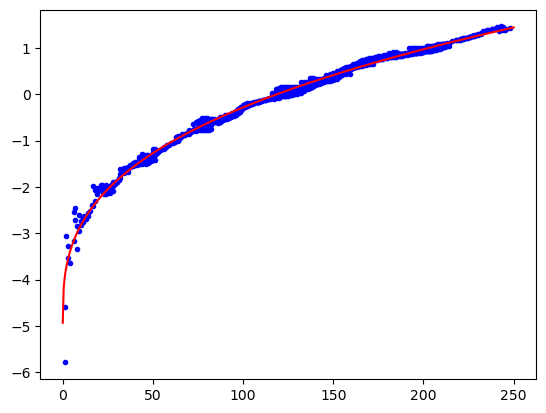

In [17]:
mod = PowerLawModel()
params = mod.make_params()

x2 = np.linspace(0,250,500)
y_plot = result.eval(x=x2)

plt.plot(x,y,"b.")
plt.plot(x2,y_plot,"r-")

## Regression on Z

In [19]:
y=df_scaled["radius_val"]
x=df_scaled["z"]

mod = PowerLawModel() + ConstantModel()
params = mod.make_params()
params["exponent"].set(value=1/3)
params["amplitude"].set(value=1)
result = mod.fit(y, params, x=x)
print(result.fit_report())

[[Model]]
    (Model(powerlaw) + Model(constant))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 957
    # variables        = 3
    chi-square         = 9.13048328
    reduced chi-square = 0.00957074
    Akaike info crit   = -4446.14082
    Bayesian info crit = -4431.54941
    R-squared          = 0.99045927
[[Variables]]
    amplitude:  1.03184449 +/- 0.03545256 (3.44%) (init = 1)
    exponent:   0.38626765 +/- 0.00567115 (1.47%) (init = 0.3333333)
    c:         -4.68832299 +/- 0.05651106 (1.21%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, exponent) = -0.9957
    C(amplitude, c)        = -0.9833
    C(exponent, c)         = +0.9630


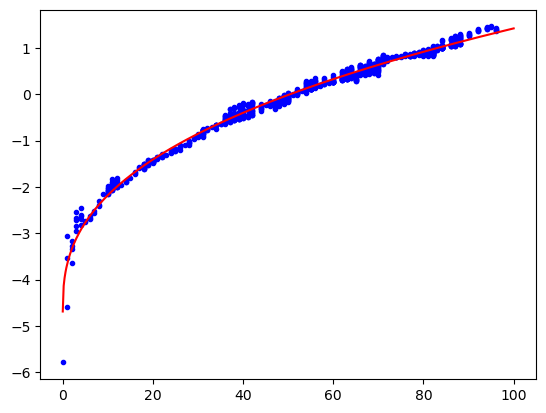

In [20]:
x2 = np.linspace(0,100,500)
y_plot = result.eval(x=x2)

plt.plot(x,y,"b.")
plt.plot(x2,y_plot,"r-")

## Regression on N

In [22]:
y=df_scaled["radius_val"]
x=df_scaled["n"]

mod = PowerLawModel() + ConstantModel()
params = mod.make_params()
params["exponent"].set(value=1/3)
params["amplitude"].set(value=1)
result = mod.fit(y, params, x=x)
print(result.fit_report())

[[Model]]
    (Model(powerlaw) + Model(constant))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 957
    # variables        = 3
    chi-square         = 18.7957050
    reduced chi-square = 0.01970200
    Akaike info crit   = -3755.17748
    Bayesian info crit = -3740.58607
    R-squared          = 0.98035976
[[Variables]]
    amplitude:  1.14078220 +/- 0.05661979 (4.96%) (init = 1)
    exponent:   0.33841061 +/- 0.00738993 (2.18%) (init = 0.3333333)
    c:         -4.76521797 +/- 0.08708879 (1.83%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, exponent) = -0.9957
    C(amplitude, c)        = -0.9857
    C(exponent, c)         = +0.9667


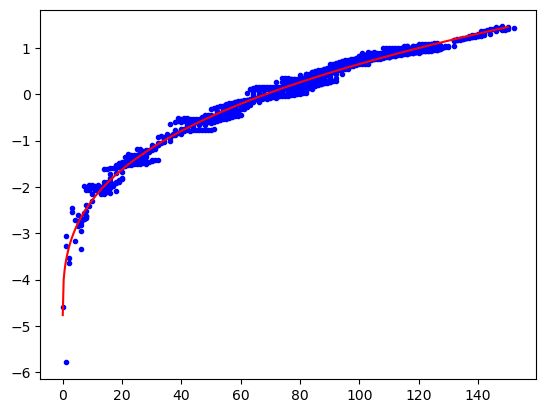

In [23]:
x2 = np.linspace(0,150,500)
y_plot = result.eval(x=x2)

plt.plot(x,y,"b.")
plt.plot(x2,y_plot,"r-")

## Regression on Mass

In [25]:
df_sorted = df_scaled.sort_values("ATOMIC MASS",axis=0)
y=df_sorted["radius_val"]
x=df_sorted["ATOMIC MASS"]-min(df_sorted["ATOMIC MASS"]) # shift to only positive values

mod = PowerLawModel() + ConstantModel()
params = mod.make_params()
params["exponent"].set(value=1/3)
params["amplitude"].set(value=1)
result = mod.fit(y, params, x=x)
print(result.fit_report())

[[Model]]
    (Model(powerlaw) + Model(constant))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 957
    # variables        = 3
    chi-square         = 7.16055463
    reduced chi-square = 0.00750582
    Akaike info crit   = -4678.72166
    Bayesian info crit = -4664.13025
    R-squared          = 0.99251771
[[Variables]]
    amplitude:  3.57442198 +/- 0.04574099 (1.28%) (init = 1)
    exponent:   0.36606289 +/- 0.00431501 (1.18%) (init = 0.3333333)
    c:         -4.59151380 +/- 0.04430855 (0.97%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, c)        = -0.9952
    C(amplitude, exponent) = -0.9756
    C(exponent, c)         = +0.9545


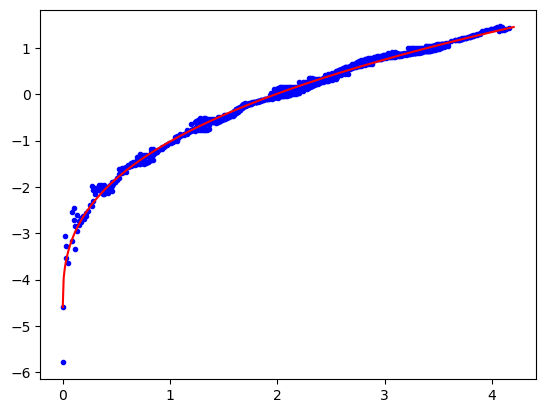

In [26]:
x2 = np.linspace(0,4.2,500)
y_plot = result.eval(x=x2)

plt.plot(x,y,"b.")
plt.plot(x2,y_plot,"r-")

## Regression on Mass Excess

In [28]:
from lmfit.models import PolynomialModel

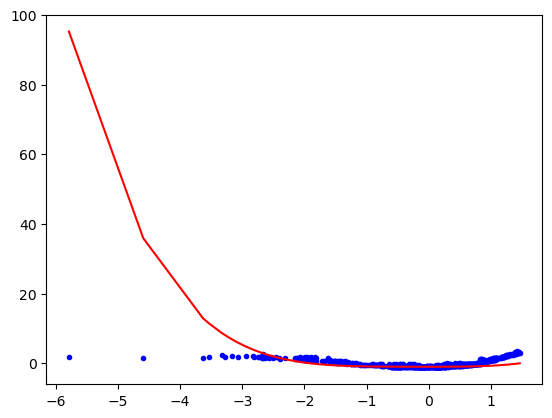

In [29]:
df_sorted = df_scaled.sort_values("radius_val",axis=0)
x=df_sorted["radius_val"]
y=df_sorted["MASS EXCESS"]

mod = PolynomialModel(degree=4)
params = mod.make_params()
params["c0"].set(value=-1)
params["c1"].set(value=0)
params["c2"].set(value=.1)
params["c3"].set(value=.1)
params["c4"].set(value=.1)

y_guess = mod.eval(x=x,params=params)

plt.plot(x,y,"b.")
plt.plot(x,y_guess,"r-")

In [30]:
result = mod.fit(y, params, x=x)
print(result.fit_report())

[[Model]]
    Model(polynomial)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 13
    # data points      = 957
    # variables        = 5
    chi-square         = 46.0445851
    reduced chi-square = 0.04836616
    Akaike info crit   = -2893.72292
    Bayesian info crit = -2869.40390
    R-squared          = 0.95188654
[[Variables]]
    c0: -0.97675901 +/- 0.01011776 (1.04%) (init = -1)
    c1:  0.18281345 +/- 0.01432524 (7.84%) (init = 0)
    c2:  1.29538726 +/- 0.01047978 (0.81%) (init = 0.1)
    c3:  0.40182227 +/- 0.00771299 (1.92%) (init = 0.1)
    c4:  0.03395018 +/- 0.00114020 (3.36%) (init = 0.1)
[[Correlations]] (unreported correlations are < 0.100)
    C(c3, c4) = +0.9643
    C(c1, c4) = -0.7756
    C(c1, c3) = -0.7635
    C(c2, c3) = +0.7122
    C(c0, c2) = -0.6787
    C(c2, c4) = +0.5417
    C(c0, c3) = -0.3472
    C(c1, c2) = -0.2933
    C(c0, c4) = -0.2228


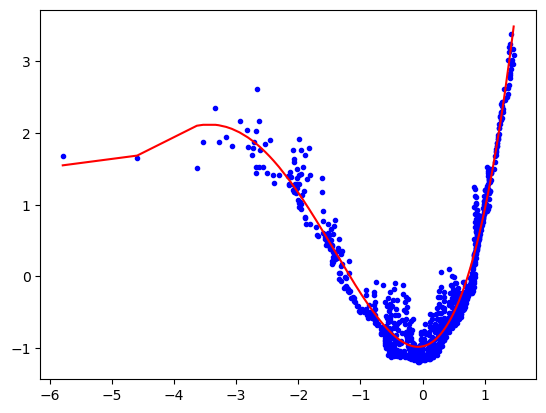

In [31]:
plt.plot(x,y,"b.")
plt.plot(x,result.best_fit,"r-")

## Regression on Binding Energy

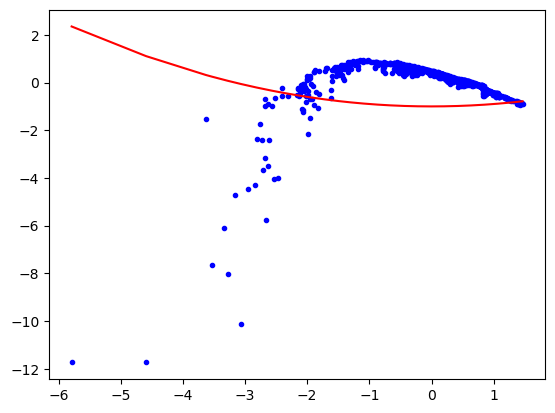

In [33]:
df_sorted = df_scaled.sort_values("radius_val",axis=0)
x=df_sorted["radius_val"]
y=df_sorted["BINDING ENERGY/A"]

mod = PolynomialModel(degree=2)
params = mod.make_params()
params["c0"].set(value=-1)
params["c1"].set(value=0)
params["c2"].set(value=.1)
#params["c3"].set(value=.1)
#params["c4"].set(value=.1)

y_guess = mod.eval(x=x,params=params)

plt.plot(x,y,"b.")
plt.plot(x,y_guess,"r-")

In [34]:
result = mod.fit(y, params, x=x)
print(result.fit_report())

[[Model]]
    Model(polynomial)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 9
    # data points      = 957
    # variables        = 3
    chi-square         = 214.441248
    reduced chi-square = 0.22478118
    Akaike info crit   = -1425.44958
    Bayesian info crit = -1410.85817
    R-squared          = 0.77592346
[[Variables]]
    c0:  0.56043816 +/- 0.01825046 (3.26%) (init = -1)
    c1: -0.51638229 +/- 0.01940732 (3.76%) (init = 0)
    c2: -0.56043816 +/- 0.00990950 (1.77%) (init = 0.1)
[[Correlations]] (unreported correlations are < 0.100)
    C(c1, c2) = +0.6135
    C(c0, c2) = -0.5430
    C(c0, c1) = -0.3331


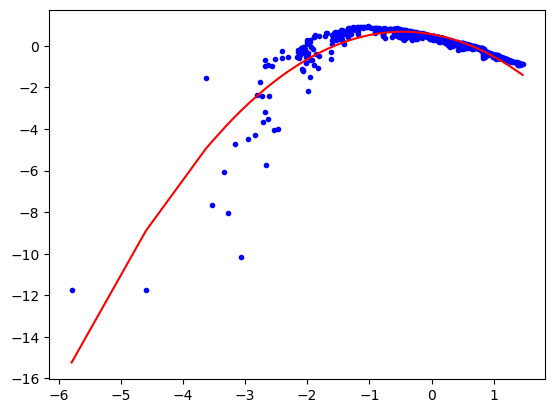

In [35]:
plt.plot(x,y,"b.")
plt.plot(x,result.best_fit,"r-")